# TAREA 4: Algoritmos de Aprendizaje No Supervisado

In [1]:
# Aquí se cargaron las librerías necesarias.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet
from scipy.spatial.distance import pdist
import warnings
warnings.filterwarnings('ignore')

## Punto 1: Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.

## Análisis Exploratorio de los Datos.

In [2]:
# Cargamos los datos del dataset
Datos= pd.read_csv('C:/Unad/Mall_Customers.csv')
Datos.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [3]:
#Aqui miramos cuantos registros y cuantas columnas tiene el dataset.
Datos.shape

(200, 5)

In [7]:
#Aqui una descripcion de las caracteristicas del dataset.
Datos.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


## Punto 2: Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario

In [46]:
#Aqui miramos si hay valores Nulos.
Datos.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [8]:
#Aqui se borran los valores nulos, esto si en caso tal los hayan dentro del dataset.
Datos.dropna()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


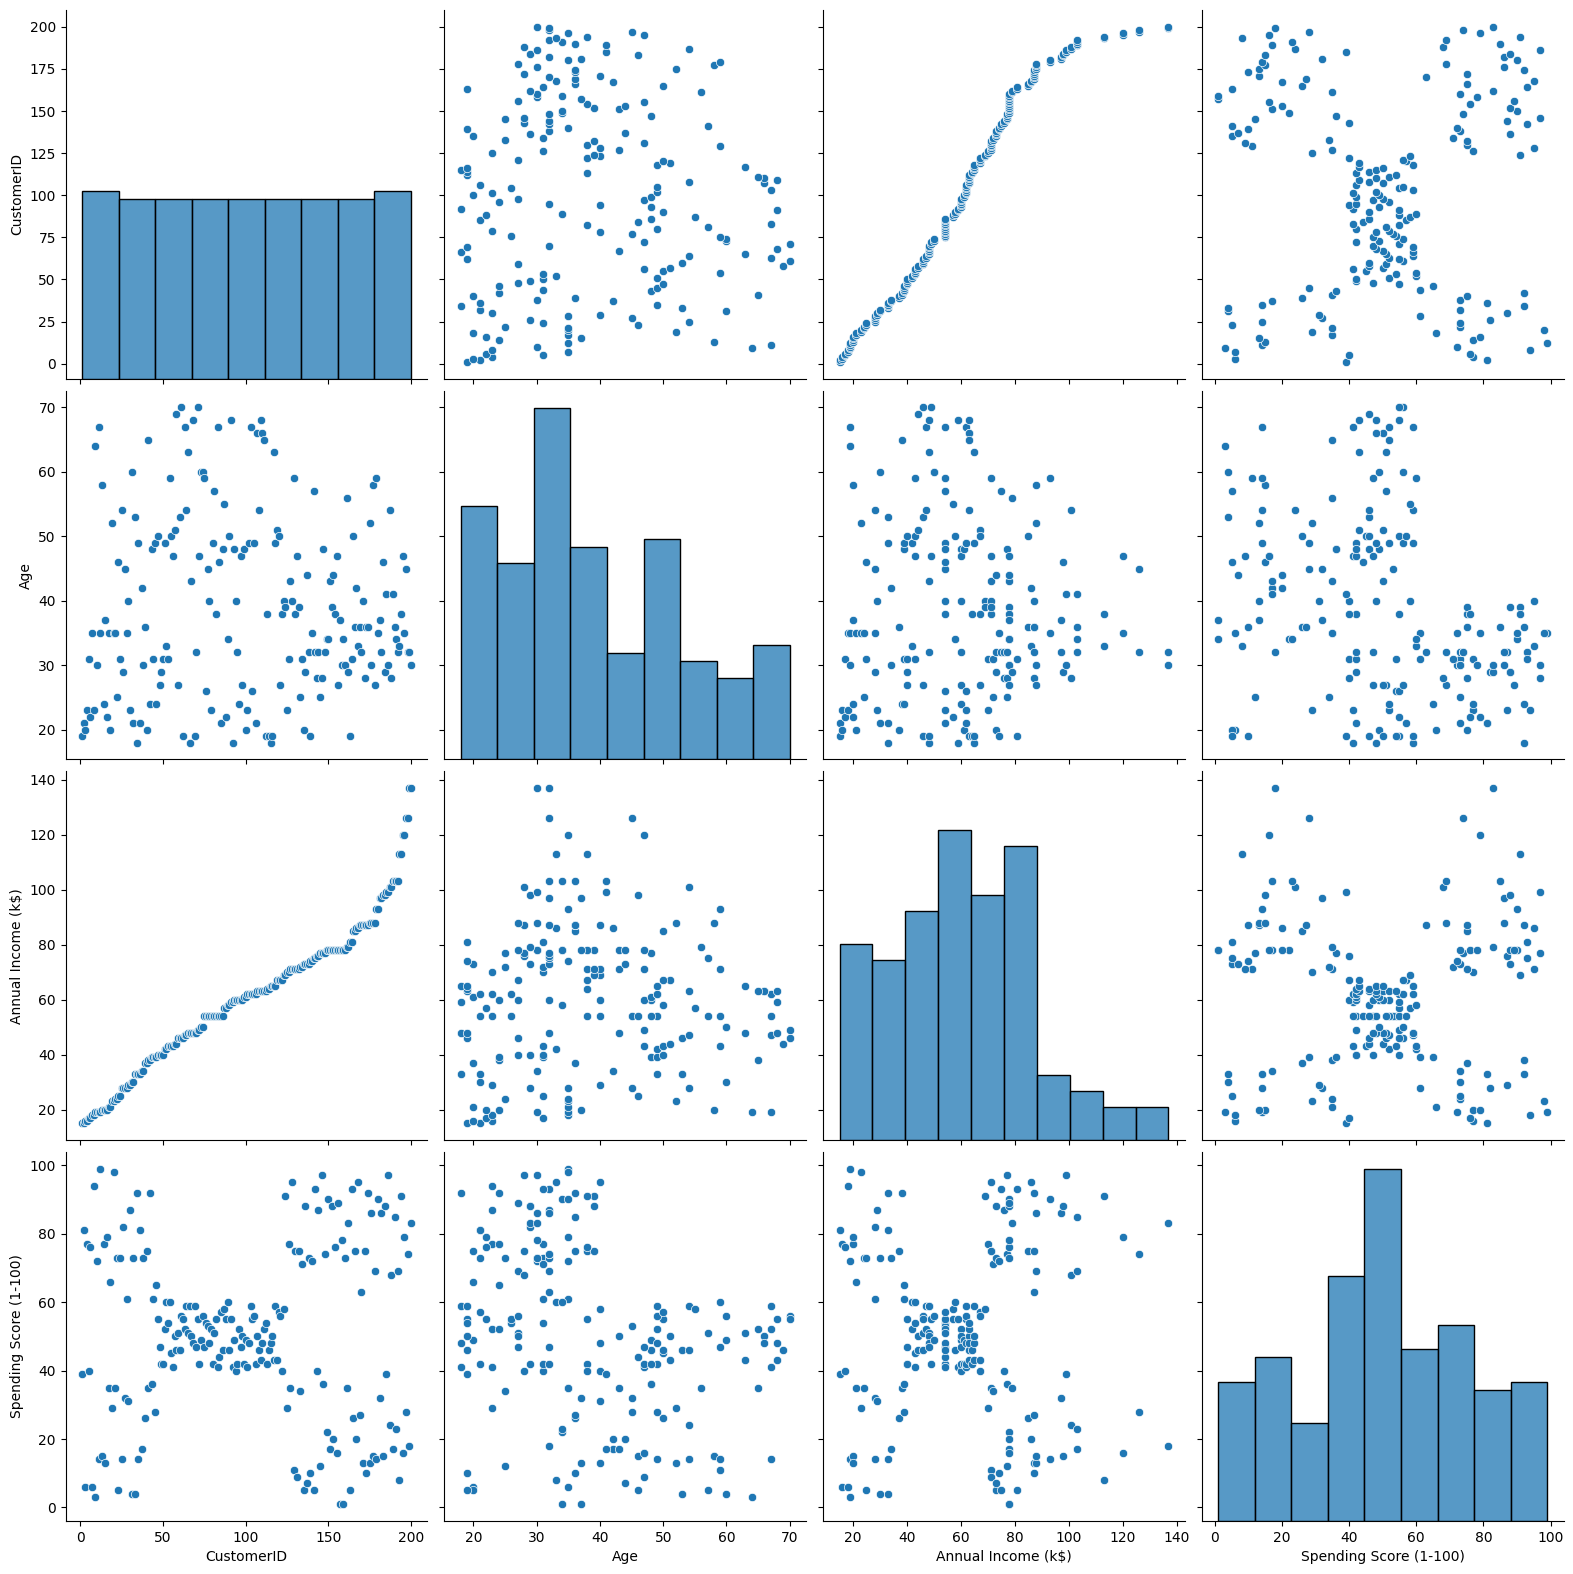

In [11]:
# Visualización de diagramas de dispersion para identificar correlaciones entre variables.
sns.pairplot(Datos.dropna(), height=4, kind='scatter')


In [15]:
#Por otra parte podemos mirar mediante una matriz de correlacion
corr_matrix = Datos.select_dtypes(include=['number']).corr()
print(corr_matrix)


                        CustomerID       Age  Annual Income (k$)  \
CustomerID                1.000000 -0.026763            0.977548   
Age                      -0.026763  1.000000           -0.012398   
Annual Income (k$)        0.977548 -0.012398            1.000000   
Spending Score (1-100)    0.013835 -0.327227            0.009903   

                        Spending Score (1-100)  
CustomerID                            0.013835  
Age                                  -0.327227  
Annual Income (k$)                    0.009903  
Spending Score (1-100)                1.000000  


<Axes: >

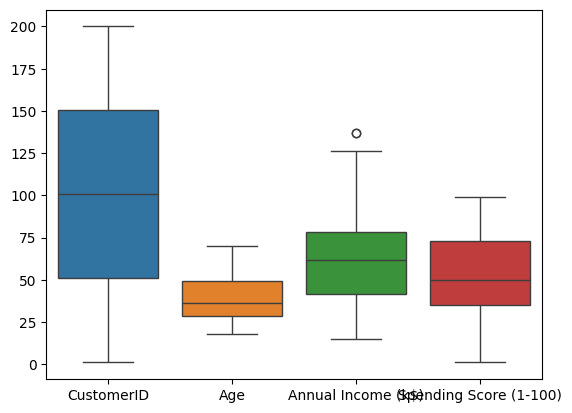

In [19]:
#Aqui vamos a mirar los diagramas de caja para variables.
sns.boxplot(data=Datos)

## Paso 3: Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características.

In [29]:
# Cargamos el dataset
Datos = pd.read_csv('C:/Unad/Mall_Customers.csv')  

# Convertimos variables categóricas a variables numéricas
Datos_codificados = pd.get_dummies(Datos, drop_first=True)

# Estandarizamos los datos
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(Datos_codificados), columns=Datos_codificados.columns)



## Implementacion del Modelo KMEANS

## Paso 4: Entrenar el modelo configurando los diferentes hiperparámetros.

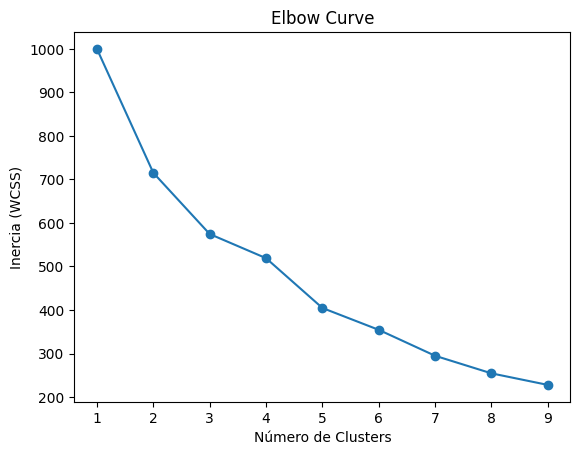

In [50]:
Nc = range(1, 10)
inercia = []

for i in Nc:
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(x)
    inercia.append(kmeans.inertia_)

# Graficamos la curva del codo
plt.plot(Nc, inercia, marker='o')
plt.xlabel("Número de Clusters")
plt.ylabel("Inercia (WCSS)")
plt.title("Elbow Curve")
plt.show()


## Paso 5: Evaluar el desempeño del modelo con métricas como Coeficiente de Silhouette, Índice de Calinski-Harabasz, etc.

## Evaluación del Modelo

In [54]:
# Entrenar el modelo con varios numeros de clusters

kmeans = KMeans(n_clusters=3, random_state=42).fit(x)
centroids = kmeans.cluster_centers_
centroids


array([[-0.47192101,  1.13852727, -0.42245682, -0.37379617,  0.04093069],
       [ 0.96109881, -0.32136456,  0.89868589,  0.07258729,  0.07402327],
       [-1.03771518, -0.86450717, -0.99357269,  0.33934611, -0.175385  ]])

## Visualización de Resultados (K-means)

In [55]:
# Ahora obtenemos las etiquetas de cada punto de nuestros Datos.
labels = kmeans.labels_

#Ahora obtendremos los centroids
C = kmeans.cluster_centers_
colores=['red', 'green', 'cyan']
asignar=[]
for row in labels:
    asignar.append(colores[row])

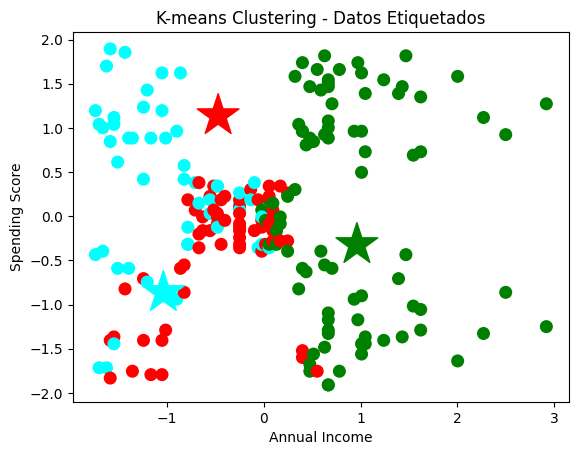

In [68]:
f1 = x['Annual Income (k$)'].values
f2 = x['Spending Score (1-100)'].values
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:,0], C[:,1], marker='*', c=colores, s=1000)
plt.title('K-means Clustering - Datos Etiquetados')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

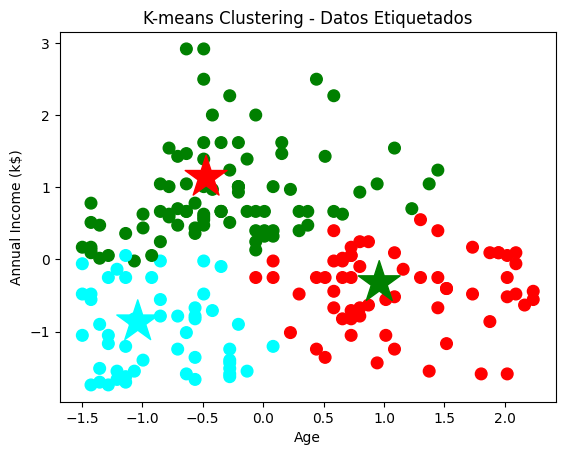

In [70]:
f1 = x['Age'].values
f2 = x['Annual Income (k$)'].values
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:,0], C[:,1], marker='*', c=colores, s=1000)
plt.title('K-means Clustering - Datos Etiquetados')
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.show()

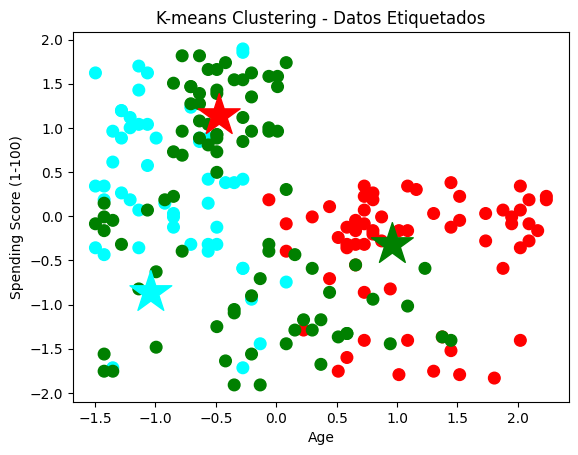

In [71]:
f1 = x['Age'].values
f2 = x['Spending Score (1-100)'].values
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:,0], C[:,1], marker='*', c=colores, s=1000)
plt.title('K-means Clustering - Datos Etiquetados')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.show()

In [81]:
# Calculamos las medidas de calidad para K-Means
print("Medidas de calidad para K-Means:")
print("Puntaje de silueta:", metrics.silhouette_score(x, labels))
print("Índice de Calinski-Harabasz:", metrics.calinski_harabasz_score(x, labels))
print("Inercia (suma de cuadrados dentro de los clusters):", kmeans.inertia_)
print("Índice de Davies-Bouldin:", metrics.davies_bouldin_score(x, labels))


Medidas de calidad para K-Means:
Puntaje de silueta: 0.2523864220334183
Índice de Calinski-Harabasz: 72.91507357998502
Inercia (suma de cuadrados dentro de los clusters): 574.628578122322
Índice de Davies-Bouldin: 1.3400328587960704


## Paso 6: Realizar las diferentes gráficas que permitan visualizar los resultados del modelo.

## Hierarchical Clustering

## Metodo Ward

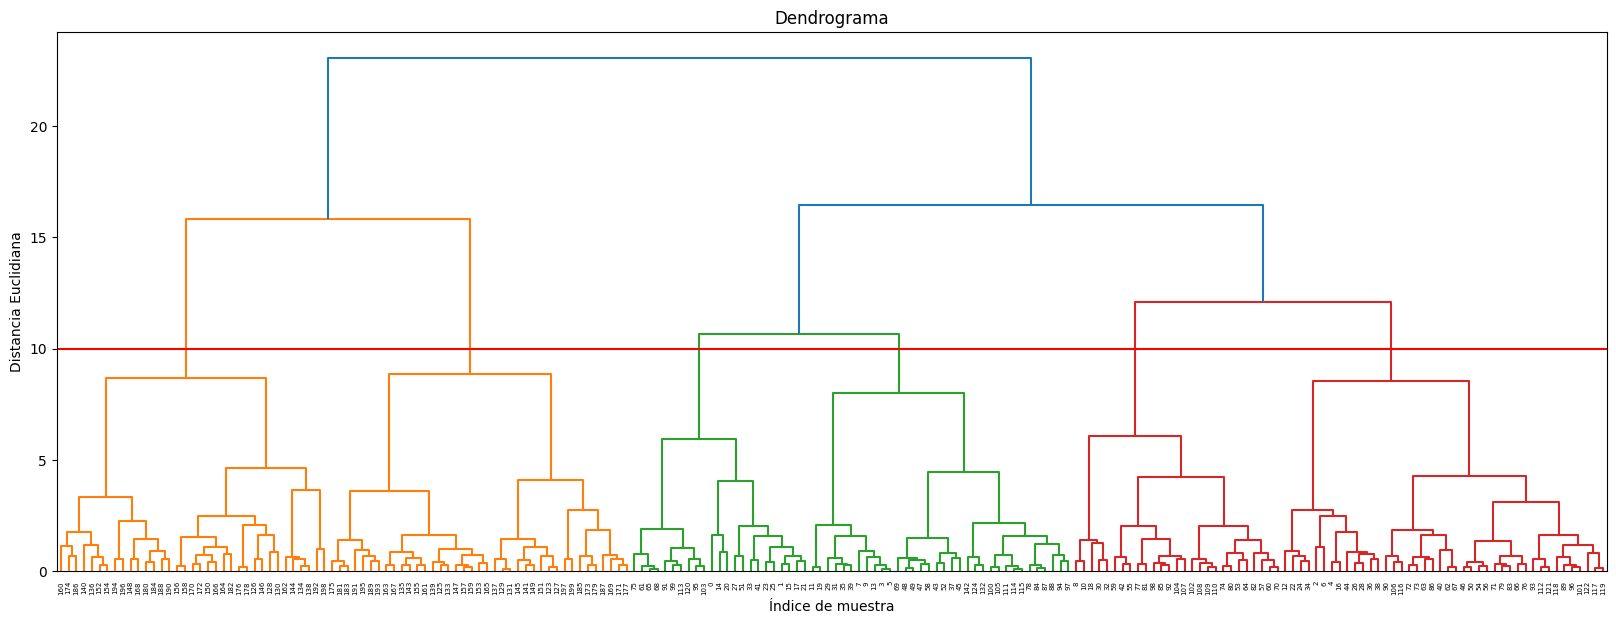

In [87]:
# Clustering jerárquico con el método de Ward y métrica euclidiana
Ward_clustering = linkage(x, method="ward", metric="euclidean")

plt.figure(figsize=(20, 7))
dendrogram(Ward_clustering)
plt.axhline(y=10, color='r', linestyle='-')
plt.title('Dendrograma')
plt.xlabel('Índice de muestra')
plt.ylabel('Distancia Euclidiana')
plt.show()

## Metodo Centroid

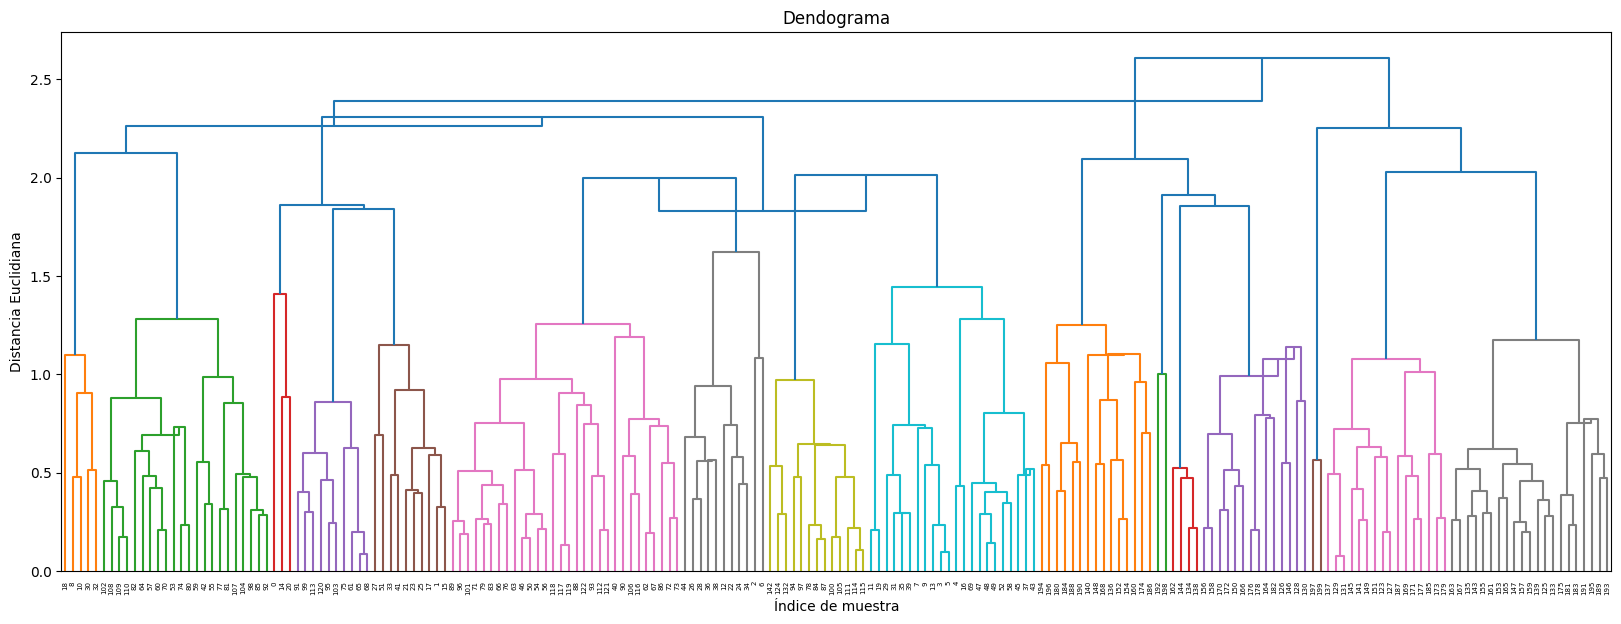

In [89]:
Centroid_clustering = linkage(x, method="centroid", metric="euclidean")

plt.figure(figsize=(20, 7))
dendrogram(Ward_clustering)
plt.axhline(y=10, color='r', linestyle='-')
plt.title('Dendograma')
plt.xlabel('Índice de muestra')
plt.ylabel('Distancia Euclidiana')
plt.show()

In [91]:
hier_clustering = AgglomerativeClustering(n_clusters=3)
labels_hier = hier_clustering.fit_predict(x)
labels_hier

array([2, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 2, 2, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2,
       1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2,
       2, 1, 1, 2, 1, 1, 2, 2, 1, 2, 1, 2, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1,
       1, 2, 1, 2, 2, 2, 1, 1, 1, 1, 2, 1, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [93]:
# Aqui obtenemos las etiquetas de cada punto de nuestros datos.
labels = labels_hier
colores=['red','green','cyan']
asignar
for row in labels:
    asignar.append(colores[row])

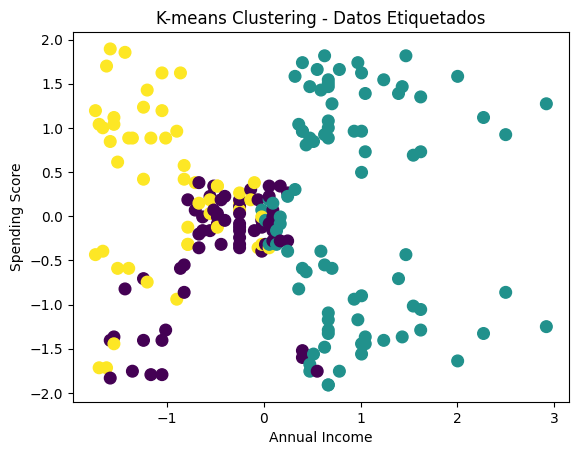

In [98]:
# Aqui estamos recalculando asignando con la misma cantidad de datos que estabamos graficando.
asignar = kmeans.predict(x) 
f1 = x['Annual Income (k$)'].values
f2 = x['Spending Score (1-100)'].values
plt.scatter(f1, f2, c=asignar, s=70)
plt.title('K-means Clustering - Datos Etiquetados')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()


In [99]:
# Calculamos las medidas de calidad para Clustering Jerarquico
print("Medidas de calidad para Clustering Jerarquico:")
print("Puntaje de silueta:", metrics.silhouette_score(x, labels_hier))
print("Índice de Calinski-Harabasz:", metrics.calinski_harabasz_score(x, labels_hier))
print("Davies-Bouldin Index:", metrics.davies_bouldin_score(x, labels_hier))

Medidas de calidad para Clustering Jerarquico:
Puntaje de silueta: 0.2363944459266719
Índice de Calinski-Harabasz: 66.01246683410993
Davies-Bouldin Index: 1.445010815576129


In [41]:
# Calcularemos el coeficiente de correlación cofenética
X = np.array([[1, 2],
              [3, 4],
              [5, 6],
              [7, 8]])

x_dist = pdist(X)
z = linkage(X, 'ward')
coef_cofenetico = cophenet(z, x_dist)

print("Coeficiente de correlación cofenética:", coef_cofenetico)



Coeficiente de correlación cofenética: (np.float64(0.6324555320336758), array([2.82842712, 8.        , 8.        , 8.        , 8.        ,
       2.82842712]))


## Análisis y Correcciones para el Código de Clustering.

## Basado en los comentarios de la profesora, se implementaron las correcciones necesarias y los elementos que faltan en a implementación de K-Means y Hierarchical Clustering.

## Código corregido.

## Implementación faltante para Hierarchical Clustering
## Método Silhouette para determinar número óptimo de clusters

Para n_clusters = 2, el promedio del silhouette score es: 0.2511952763244898
Para n_clusters = 3, el promedio del silhouette score es: 0.2363944459266719
Para n_clusters = 4, el promedio del silhouette score es: 0.2926024466238545
Para n_clusters = 5, el promedio del silhouette score es: 0.30454552617046354
Para n_clusters = 6, el promedio del silhouette score es: 0.3273267369164873


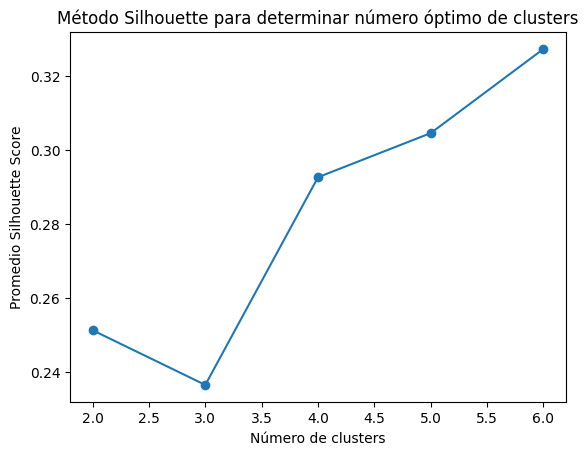

In [35]:
range_n_clusters = [2, 3, 4, 5, 6]
silhouette_avg_scores = []

for n_clusters in range_n_clusters:
    clusterer = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
    cluster_labels = clusterer.fit_predict(x)
    
    # The silhouette_score gives the average value for all the samples.
    silhouette_avg = silhouette_score(x, cluster_labels)
    silhouette_avg_scores.append(silhouette_avg)
    print(f"Para n_clusters = {n_clusters}, el promedio del silhouette score es: {silhouette_avg}")

# Aui Graficamos los silhouette scores
plt.plot(range_n_clusters, silhouette_avg_scores, marker='o')
plt.xlabel('Número de clusters')
plt.ylabel('Promedio Silhouette Score')
plt.title('Método Silhouette para determinar número óptimo de clusters')
plt.show()

## Entrenar con los 2 mejores valores de clusters
## Supongamos que los mejores fueron 4 y 5.

In [37]:
# Importaciones necesarias
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.cluster import AgglomerativeClustering

# Supongamos que los mejores valores fueron 4 y 5
best_n_clusters = sorted(zip(range_n_clusters, silhouette_avg_scores), key=lambda x: x[1], reverse=True)[:2]

for n_clusters, score in best_n_clusters:
    print(f"\nEvaluación con {n_clusters} clusters (score: {score}):")

    # Inicializar y ajustar el modelo
    agg = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
    labels = agg.fit_predict(x)

    # Calcular métricas
    print(f"Silhouette Score: {silhouette_score(x, labels)}")
    print(f"Calinski-Harabasz Index: {calinski_harabasz_score(x, labels)}")
    print(f"Davies-Bouldin Index: {davies_bouldin_score(x, labels)}")



Evaluación con 6 clusters (score: 0.3273267369164873):
Silhouette Score: 0.3273267369164873
Calinski-Harabasz Index: 74.28233987716496
Davies-Bouldin Index: 1.1440948835825626

Evaluación con 5 clusters (score: 0.30454552617046354):
Silhouette Score: 0.30454552617046354
Calinski-Harabasz Index: 73.14745555320295
Davies-Bouldin Index: 1.1739403048228036


## Ajuste del dendrograma

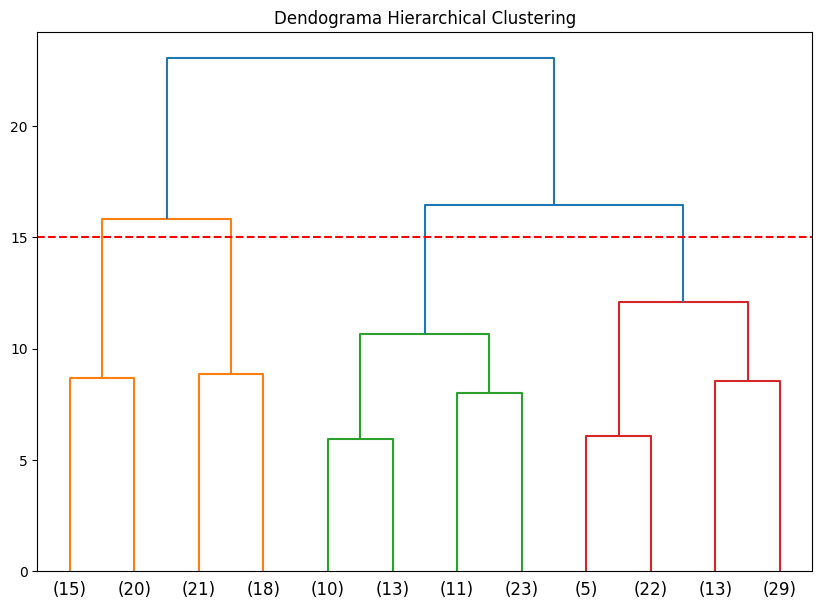

In [39]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
plt.title("Dendograma Hierarchical Clustering")
Z = linkage(x, 'ward')
dendrogram(Z, truncate_mode='lastp', p=12, show_leaf_counts=True)
plt.axhline(y=15, color='r', linestyle='--')  # Línea horizontal en y=15
plt.show()
